In [ ]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_0OECtn8.csv
# !wget https://datahack-prod.s3.amazonaws.com/test_file/test_1zqHu22.csv

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [7]:
raw_train = pd.read_csv("train_0OECtn8.csv")
raw_test = pd.read_csv("test_1zqHu22.csv")

In [8]:
print(f"Train shape {raw_train.shape}, Test shape {raw_test.shape}")

Train shape (89197, 10), Test shape (11121, 9)


In [9]:
raw_train.head(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35


In [13]:
raw_train.tail(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
89194,89195,13655,16,97,25,Male,Student,270,462,4.23
89195,89196,24840,9,18,35,Male,Working Professional,230,819,3.77
89196,89197,27183,25,150,13,Male,Student,240,317,4.31


In [14]:
raw_test.head(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628


In [16]:
raw_test.tail(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
11118,100316,2042,16,98,22,Male,Student,270,462
11119,100317,24626,8,16,33,Male,Other,280,628
11120,100318,967,8,74,33,Male,Working Professional,280,628


In [17]:
raw_train.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [18]:
raw_test.isna().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [20]:
raw_train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [21]:
raw_train.describe(include=np.object)

,gender,profession
count,89197,89197
unique,2,3
top,Male,Student
freq,52397,44638


In [24]:
raw_train['user_id'].value_counts().min(),raw_train['user_id'].value_counts().max()

(2, 10)

In [25]:
raw_train['user_id'].value_counts().head(3)

5198     10
13218    10
1448     10
Name: user_id, dtype: int64

In [26]:
raw_train[raw_train['user_id']==5198]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
22708,22709,5198,5,56,32,Male,Other,240,229,4.30
28089,28090,5198,5,79,32,Male,Other,240,229,4.60
32687,32688,5198,5,9,32,Male,Other,240,229,4.50
33424,33425,5198,5,169,32,Male,Other,240,229,4.28
35305,35306,5198,5,163,32,Male,Other,240,229,4.26
48919,48920,5198,5,161,32,Male,Other,240,229,4.47
62534,62535,5198,5,69,32,Male,Other,240,229,4.13
73528,73529,5198,5,90,32,Male,Other,240,229,4.44
79107,79108,5198,5,10,32,Male,Other,240,229,4.51
85219,85220,5198,5,155,32,Male,Other,240,229,4.44


In [27]:
common_user_id = set(raw_train['user_id'].unique()).intersection(set(raw_test['user_id'].unique()))
len(common_user_id)

10384

In [29]:
raw_train['user_id'].nunique(), raw_test['user_id'].nunique()

(27734, 10384)

In [32]:
raw_train['category_id'].value_counts(normalize=True).sort_index()

1     0.020292
2     0.001872
3     0.020685
4     0.041235
5     0.090855
6     0.015684
7     0.021133
8     0.070776
9     0.021144
10    0.013644
11    0.042221
12    0.043600
13    0.031133
14    0.006009
15    0.024261
16    0.036593
17    0.013543
18    0.025124
19    0.052457
20    0.007870
21    0.045327
22    0.004103
23    0.029945
24    0.005875
25    0.054710
26    0.012960
27    0.012366
28    0.014675
29    0.010269
30    0.006144
31    0.020797
32    0.030405
33    0.005796
34    0.036963
35    0.011054
36    0.011491
37    0.010785
38    0.005987
39    0.015012
40    0.005135
41    0.006110
42    0.024418
43    0.011424
44    0.002399
45    0.002545
46    0.002646
47    0.000527
Name: category_id, dtype: float64

In [52]:
raw_train['video_id'].value_counts(normalize=False).head(10)

112    1337
53     1334
1      1282
65     1103
42     1077
46      938
4       932
10      921
5       913
87      902
Name: video_id, dtype: int64

In [55]:
raw_train[raw_train['video_id']==10]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
115,116,476,5,10,21,Female,Student,240,229,2.48
181,182,16877,5,10,29,Female,Other,240,229,3.22
214,215,13064,5,10,33,Female,Other,240,229,2.30
357,358,25281,5,10,16,Male,Student,240,229,3.80
399,400,3718,5,10,14,Female,Student,240,229,4.57
...,...,...,...,...,...,...,...,...,...,...
88844,88845,16113,5,10,15,Female,Student,240,229,2.80
88901,88902,21712,5,10,24,Male,Other,240,229,3.64
89066,89067,17572,5,10,13,Male,Student,240,229,3.62
89133,89134,26217,5,10,20,Female,Student,240,229,2.19


In [54]:
raw_test[raw_test['video_id']==10]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
51,89249,4033,5,10,26,Female,Working Professional,240,229
92,89290,25610,5,10,40,Female,Working Professional,240,229
285,89483,19113,5,10,15,Female,Student,240,229
362,89560,15928,5,10,25,Female,Other,240,229
371,89569,8313,5,10,25,Male,Other,240,229
...,...,...,...,...,...,...,...,...,...
10901,100099,5556,5,10,22,Female,Working Professional,240,229
11013,100211,8865,5,10,32,Female,Working Professional,240,229
11039,100237,18756,5,10,35,Male,Other,240,229
11050,100248,4483,5,10,36,Female,Other,240,229


In [61]:
raw_test[raw_test['video_id']==1].sort_values(by='user_id')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
56,89254,16,19,1,16,Female,Student,230,369
5032,94230,78,1,1,18,Male,Student,360,990
9168,98366,362,19,1,31,Male,Other,230,369
9474,98672,1041,19,1,16,Female,Student,230,369
5133,94331,1080,19,1,26,Male,Other,230,369
...,...,...,...,...,...,...,...,...,...
8440,97638,27347,1,1,32,Male,Other,360,990
7058,96256,27390,1,1,13,Female,Student,360,990
1418,90616,27479,19,1,36,Female,Working Professional,230,369
9950,99148,27501,19,1,14,Female,Student,230,369


In [59]:
raw_train[raw_train['video_id']==1].sort_values(by='user_id')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
30684,30685,1,1,1,18,Female,Student,360,990,2.88
82236,82237,10,1,1,26,Female,Student,360,990,2.70
1105,1106,36,19,1,15,Male,Student,230,369,4.25
10818,10819,51,19,1,18,Female,Student,230,369,4.29
43691,43692,56,1,1,33,Female,Other,360,990,2.30
...,...,...,...,...,...,...,...,...,...,...
68490,68491,27663,1,1,37,Male,Working Professional,360,990,3.32
51117,51118,27669,19,1,18,Male,Student,230,369,4.21
34829,34830,27691,19,1,30,Male,Other,230,369,3.81
75844,75845,27696,1,1,22,Female,Other,360,990,4.25


In [45]:
raw_train.groupby(['video_id'])[['followers','views','category_id']].std()

,followers,views,category_id
video_id,,,
1,64.827241,309.674744,8.97608
2,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.00000
...,...,...,...
171,0.000000,0.000000,0.00000
172,0.000000,0.000000,0.00000
173,0.000000,0.000000,0.00000


In [39]:
raw_train['video_id'].nunique(),raw_test['video_id'].nunique()

(175, 128)

In [56]:
common_video_id = set(raw_train['video_id'].unique()).intersection(set(raw_test['video_id'].unique()))
len(common_video_id)

128

In [73]:
raw_train.groupby(['video_id'])['category_id'].nunique().describe()

count    175.000000
mean       1.005714
std        0.075593
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: category_id, dtype: float64

In [71]:
raw_train.groupby(['user_id'])['profession'].nunique().describe()

count    27734.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: profession, dtype: float64

In [95]:
df = pd.concat([raw_train,raw_test],axis=0,ignore_index=True,sort=False)
df.shape[0] == raw_train.shape[0]+raw_test.shape[0]

True

In [96]:
df.sample(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
2974,2975,23962,19,44,21,Female,Working Professional,230,369,2.06
65041,65042,23331,36,107,18,Female,Student,260,178,5.00
63347,63348,26137,19,45,18,Female,Student,230,369,2.60


In [97]:
df['category_id'].nunique(),df['video_id'].nunique()

(47, 175)

In [120]:
user_profile = df.groupby(['user_id']).agg({'category_id':pd.Series.nunique,'video_id':pd.Series.nunique,'views':'count',
                                           'engagement_score':'mean'}).reset_index()

user_profile['engagement_score'] = user_profile['engagement_score'].rank()

user_profile = user_profile.rename({'category_id':'unique_cat_usr','video_id':'unique_video_usr',
                                    'views':'total_content_usr','engagement_score':'usr_rank'
                                    },axis=1)
user_profile.describe()

,user_id,unique_cat_usr,unique_video_usr,total_content_usr,usr_rank
count,27734.000000,27734.000000,27734.000000,27734.000000,27734.000000
mean,13867.500000,1.798875,3.617149,3.617149,13867.500000
std,8006.260519,0.589336,1.451445,1.451445,8006.256984
min,1.000000,1.000000,2.000000,2.000000,4.000000
25%,6934.250000,1.000000,3.000000,3.000000,6932.500000
50%,13867.500000,2.000000,3.000000,3.000000,13878.500000
75%,20800.750000,2.000000,4.000000,4.000000,20802.500000
max,27734.000000,3.000000,12.000000,12.000000,27732.500000


In [121]:
user_profile.sample(3)

,user_id,unique_cat_usr,unique_video_usr,total_content_usr,usr_rank
23210,23211,2,5,5,16734.5
8569,8570,2,4,4,23801.0
20772,20773,2,5,5,11055.0


In [122]:
df.groupby(['user_id'])['age'].std().max()

0.0

In [123]:
df.groupby(['user_id'])['followers'].std().max()

141.4213562373095

In [124]:
cat_id = df.groupby(['category_id']).agg({'user_id':pd.Series.nunique,'video_id':pd.Series.nunique,
                                          'views':'count','engagement_score':'mean'}).reset_index()

cat_id['engagement_score'] = cat_id['engagement_score'].rank()


cat_id = cat_id.rename({'user_id':'unique_usr','video_id':'unique_video_cat',
                                    'views':'total_content_cat','engagement_score':'cat_rank'
                                    },axis=1)
cat_id.describe()


,category_id,unique_usr,unique_video_cat,total_content_cat,cat_rank
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,24.000000,1061.489362,3.744681,2134.425532,24.000000
std,13.711309,730.989469,4.613157,2078.421169,13.711309
min,1.000000,47.000000,1.000000,47.000000,1.000000
25%,12.500000,529.000000,2.000000,546.500000,12.500000
50%,24.000000,869.000000,2.000000,1321.000000,24.000000
75%,35.500000,1588.500000,4.500000,2792.000000,35.500000
max,47.000000,3043.000000,31.000000,9593.000000,47.000000


In [125]:
cat_id.sample(4)

,category_id,unique_usr,unique_video_cat,total_content_cat,cat_rank
26,27,1103,1,1103,13.0
7,8,3043,10,7688,34.0
44,45,227,1,227,1.0
20,21,2484,8,4228,17.0


In [126]:
video_id = df.groupby(['video_id']).agg({'user_id':pd.Series.nunique,
                                         'views':'count','engagement_score':'mean'}).reset_index()

video_id['engagement_score'] = video_id['engagement_score'].rank()


video_id = video_id.rename({'user_id':'unique_usr_vid',
                            'views':'total_content_vid','engagement_score':'video_rank'
                            },axis=1)
video_id.describe()

,video_id,unique_usr_vid,total_content_vid,video_rank
count,175.000000,175.000000,175.000000,175.000000
mean,88.000000,573.245714,573.245714,88.000000
std,50.662281,293.527970,293.527970,50.662281
min,1.000000,47.000000,47.000000,1.000000
25%,44.500000,313.000000,313.000000,44.500000
50%,88.000000,642.000000,642.000000,88.000000
75%,131.500000,787.000000,787.000000,131.500000
max,175.000000,1514.000000,1514.000000,175.000000


In [127]:
video_id.sample(3)

,video_id,unique_usr_vid,total_content_vid,video_rank
48,49,558,558,47.0
1,2,669,669,139.0
101,102,648,648,93.0


In [128]:
raw_train.head(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35


In [129]:
featured_df = df.copy()
featured_df = featured_df.merge(user_profile,how='left',on=['user_id'])
featured_df = featured_df.merge(cat_id,how='left',on=['category_id'])
featured_df = featured_df.merge(video_id,how='left',on=['video_id'])
featured_df.head(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,unique_cat_usr,unique_video_usr,total_content_usr,usr_rank,unique_usr,unique_video_cat,total_content_cat,cat_rank,unique_usr_vid,total_content_vid,video_rank
0,1,19990,37,128,24,Male,Student,180,1000,4.33,2,3,3,27245.5,635,2,962,12.0,503,503,37.0
1,2,5304,32,132,14,Female,Student,330,714,1.79,3,5,5,7288.5,1507,4,3137,24.0,807,807,66.0
2,3,1840,12,24,19,Male,Student,180,138,4.35,1,4,4,23454.0,2020,6,4412,30.0,644,644,91.0


In [133]:
featured_df['profession'].unique()

array(['Student', 'Working Professional', 'Other'], dtype=object)

In [134]:
featured_df['male'] = (featured_df['gender'] == 'Male').astype(int)
featured_df['student'] = (featured_df['profession'] == 'Student').astype(int)
featured_df['working'] = (featured_df['profession'] == 'Working Professional').astype(int)
featured_df.sample(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,unique_cat_usr,unique_video_usr,total_content_usr,usr_rank,unique_usr,unique_video_cat,total_content_cat,cat_rank,unique_usr_vid,total_content_vid,video_rank,male,student,working
12287,12288,5127,44,165,34,Male,Working Professional,210,636,3.16,2,3,3,11038.0,125,3,226,7.0,78,78,17.0,1,0,1
52530,52531,24760,8,110,18,Female,Student,280,628,3.83,2,4,4,14577.0,3043,10,7688,34.0,739,739,143.0,0,1,0
16908,16909,12972,25,138,34,Female,Other,240,317,2.30,2,4,4,6474.0,2382,8,5841,14.0,765,765,63.0,0,0,0


In [135]:
train = featured_df[featured_df['engagement_score'].notna()].copy()
test = featured_df[featured_df['engagement_score'].isna()].copy()
train.shape[0] == raw_train.shape[0], test.shape[0] == raw_test.shape[0]

(True, True)

In [136]:
train.sample(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,unique_cat_usr,unique_video_usr,total_content_usr,usr_rank,unique_usr,unique_video_cat,total_content_cat,cat_rank,unique_usr_vid,total_content_vid,video_rank,male,student,working
47951,47952,19834,21,129,38,Female,Working Professional,320,909,2.06,2,3,3,1017.5,2484,8,4228,17.0,309,309,78.0,0,0,1
16113,16114,22596,11,66,15,Female,Student,250,180,3.77,2,4,4,11669.0,1711,6,4740,25.0,752,752,94.0,0,1,0
77590,77591,9562,32,132,19,Male,Student,330,714,3.77,3,5,5,23181.5,1507,4,3137,24.0,807,807,66.0,1,1,0


In [156]:
train_cols = ['age', 'followers', 'views','unique_cat_usr',
            'unique_video_usr', 'total_content_usr', 'usr_rank', 'unique_usr',
            'unique_video_cat', 'total_content_cat', 'cat_rank', 'unique_usr_vid',
            'total_content_vid', 'video_rank', 'male', 'student', 'working','engagement_score']
sub_train = train[train_cols]
sub_train.head(3)

,age,followers,views,unique_cat_usr,unique_video_usr,total_content_usr,usr_rank,unique_usr,unique_video_cat,total_content_cat,cat_rank,unique_usr_vid,total_content_vid,video_rank,male,student,working,engagement_score
0,24,180,1000,2,3,3,27245.5,635,2,962,12.0,503,503,37.0,1,1,0,4.33
1,14,330,714,3,5,5,7288.5,1507,4,3137,24.0,807,807,66.0,0,1,0,1.79
2,19,180,138,1,4,4,23454.0,2020,6,4412,30.0,644,644,91.0,1,1,0,4.35


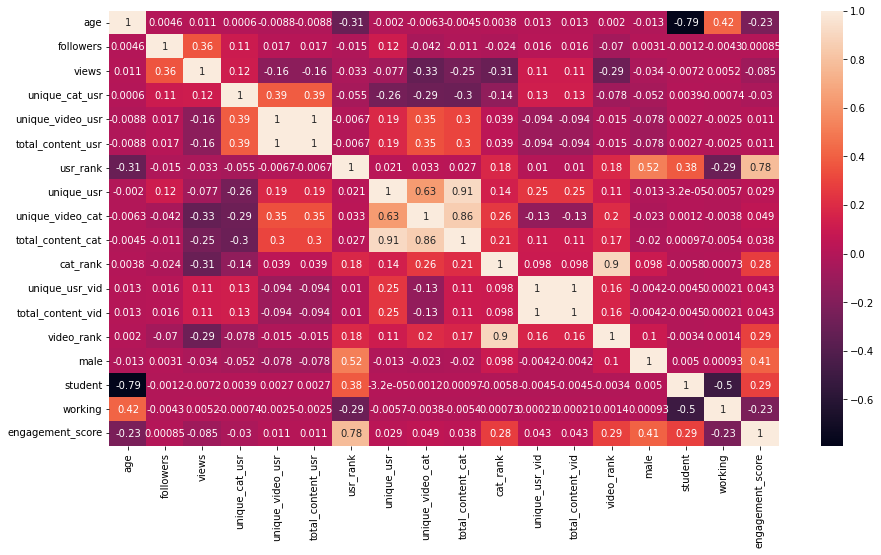

In [157]:
corr = sub_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [158]:
x_train = sub_train.drop(['engagement_score'],axis=1)
y_train = sub_train['engagement_score']

scaler = StandardScaler()
train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(train_scaled,index=x_train.index,columns=x_train.columns)
x_train.head(3)

,age,followers,views,unique_cat_usr,unique_video_usr,total_content_usr,usr_rank,unique_usr,unique_video_cat,total_content_cat,cat_rank,unique_usr_vid,total_content_vid,video_rank,male,student,working
0,-0.094759,-1.572002,1.850629,0.127028,-0.662592,-0.662592,1.698191,-1.371838,-0.647159,-1.142798,-1.173624,-0.808649,-0.808649,-1.028114,0.838051,0.999115,-0.49789
1,-1.211393,1.682203,0.785722,1.774618,0.543186,0.543186,-0.830852,-0.223567,-0.395254,-0.315185,-0.166627,0.329429,0.329429,-0.460280,-1.193244,0.999115,-0.49789
2,-0.653076,-1.572002,-1.358987,-1.520563,-0.059703,-0.059703,1.217715,0.451963,-0.143349,0.169968,0.336872,-0.280791,-0.280791,0.029232,0.838051,0.999115,-0.49789


In [159]:
r2_scorer = make_scorer(r2_score)

In [160]:
def cross_validation(x_train,y_train,model,model_name,cv=5,scoring=r2_scorer):
    scores = cross_val_score(model, x_train, y_train, cv=5,scoring=scoring)
    print(f"{model_name}: mean r2_score {scores.mean():.2f} with a standard deviation of {scores.std():.2f}")
    return

In [161]:
dummy_model = DummyRegressor()
cross_validation(x_train,y_train,dummy_model,'Dummy Model')

Dummy Model: mean r2_score -0.00 with a standard deviation of 0.00


In [168]:
linear_model = LinearRegression()
cross_validation(x_train,y_train,linear_model,'Linear Model')

Linear Model: mean r2_score 0.63 with a standard deviation of 0.01


In [170]:
svm_model = SVR(kernel='poly',degree=1)
cross_validation(x_train,y_train,svm_model,'SVM Model')

SVM Model: mean r2_score 0.34 with a standard deviation of 0.01


In [173]:
knn_model = KNeighborsRegressor()
cross_validation(x_train,y_train,knn_model,'KNN Model')

KNN Model: mean r2_score 0.60 with a standard deviation of 0.01


In [176]:
rf_model =  RandomForestRegressor(max_depth=7, random_state=100)
cross_validation(x_train,y_train,rf_model,'Random Forest Model')

Random Forest Model: mean r2_score 0.68 with a standard deviation of 0.00


In [177]:
ada_boost_model =  AdaBoostRegressor(random_state=100)
cross_validation(x_train,y_train,ada_boost_model,'AdaBoot')

AdaBoot: mean r2_score 0.63 with a standard deviation of 0.00


In [179]:
gbr_model =  GradientBoostingRegressor(max_depth=5, random_state=100,subsample=0.9,learning_rate=0.05)
cross_validation(x_train,y_train,gbr_model,'Gradient boosting')

Gradient boosting: mean r2_score 0.69 with a standard deviation of 0.00


In [180]:
gbr_model =  HistGradientBoostingRegressor(max_depth=7, random_state=100,learning_rate=0.05)
cross_validation(x_train,y_train,gbr_model,'Gradient boosting')

Gradient boosting: mean r2_score 0.69 with a standard deviation of 0.00


In [181]:
xgb_model =  xgb.XGBRegressor(n_estimators=100,max_depth=5, random_state=100,learning_rate=0.05,subsample=0.8,colsample_bytree =0.8)
cross_validation(x_train,y_train,xgb_model,'XGB')

[10:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB: mean r2_score 0.69 with a standard deviation of 0.00


In [182]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 5,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100,
    "random_state":345
}
lgb_model = lgb.LGBMRegressor(**hyper_params)
cross_validation(x_train,y_train,lgb_model,'LGB')

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n

LGB: mean r2_score 0.69 with a standard deviation of 0.00


In [183]:
model = lgb_model.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [185]:
x_test = test[x_train.columns].copy()
scaled_test = scaler.transform(x_test)
x_test = pd.DataFrame(scaled_test,index=x_test.index,columns=x_test.columns)
x_test.head(3)

,age,followers,views,unique_cat_usr,unique_video_usr,total_content_usr,usr_rank,unique_usr,unique_video_cat,total_content_cat,cat_rank,unique_usr_vid,total_content_vid,video_rank,male,student,working
89197,-1.211393,-1.572002,-1.358987,-1.520563,-0.662592,-0.662592,1.220693,0.451963,-0.143349,0.169968,0.336872,1.916749,1.916749,0.694968,0.838051,0.999115,-0.497890
89198,-1.211393,-0.487267,1.254877,1.774618,1.748965,1.748965,1.149474,0.002926,-0.269302,0.005206,-2.012788,0.258299,0.258299,-1.733011,0.838051,0.999115,-0.497890
89199,2.138509,0.597468,0.465505,0.127028,1.146076,1.146076,-1.569783,1.799074,0.360461,1.416525,0.672537,0.074859,0.074859,1.047416,-1.193244,-1.000886,2.008476


In [186]:
x_test['engagement_score'] = model.predict(x_test)
x_test['engagement_score'].head(3)

89197    4.204797
89198    4.026716
89199    2.295679
Name: engagement_score, dtype: float64

In [187]:
test['engagement_score'] = x_test['engagement_score']
test[['row_id','engagement_score']].to_csv("submission_1_lgb.csv",index=False)